# Bike Sharing Assignment

## Step 1: Reading and Understanding the Data

In [278]:
# Importing all required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [279]:
# Read the given CSV file, and view some sample records
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [280]:
# Number of Rows and Columns.
bike.shape

(730, 16)

In [281]:
# Total number of rows and columns.
bike.size

11680

In [282]:
# Datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [283]:
# Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [284]:
# Summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [285]:
# Converting date to Pandas datetime format.
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['dteday'].head()

0   2018-01-01
1   2018-02-01
2   2018-03-01
3   2018-04-01
4   2018-05-01
Name: dteday, dtype: datetime64[ns]

In [286]:
# Rename the columns for better understanding
bike.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace = True)
bike.head()

,instant,date,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [287]:
# Mapping variables season, month, weathersit, weekday
bike['season'] = bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['weathersit'] = bike.weathersit.map({1:'Clear',2:'Mist+Cloudy',3:'Light Snow',4:'Snow+Fog'})
bike['weekday'] = bike.weekday.map({1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Fri',6:'Sat',0:'Sun'})
bike['months'] = bike.months.map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.head()

,instant,date,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tues,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [288]:
# Correlation Values
bike.corr()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
instant,1.000000,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
year,0.866026,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.015171,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.150738,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,0.016080,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


## Step 2: Data Visualisation

In [289]:
# Identify Continuous and Categorical Features.
bike.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
months         12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
date          730
dtype: int64

### Visualising Numeric Variables :-

#### PAIRPLOT

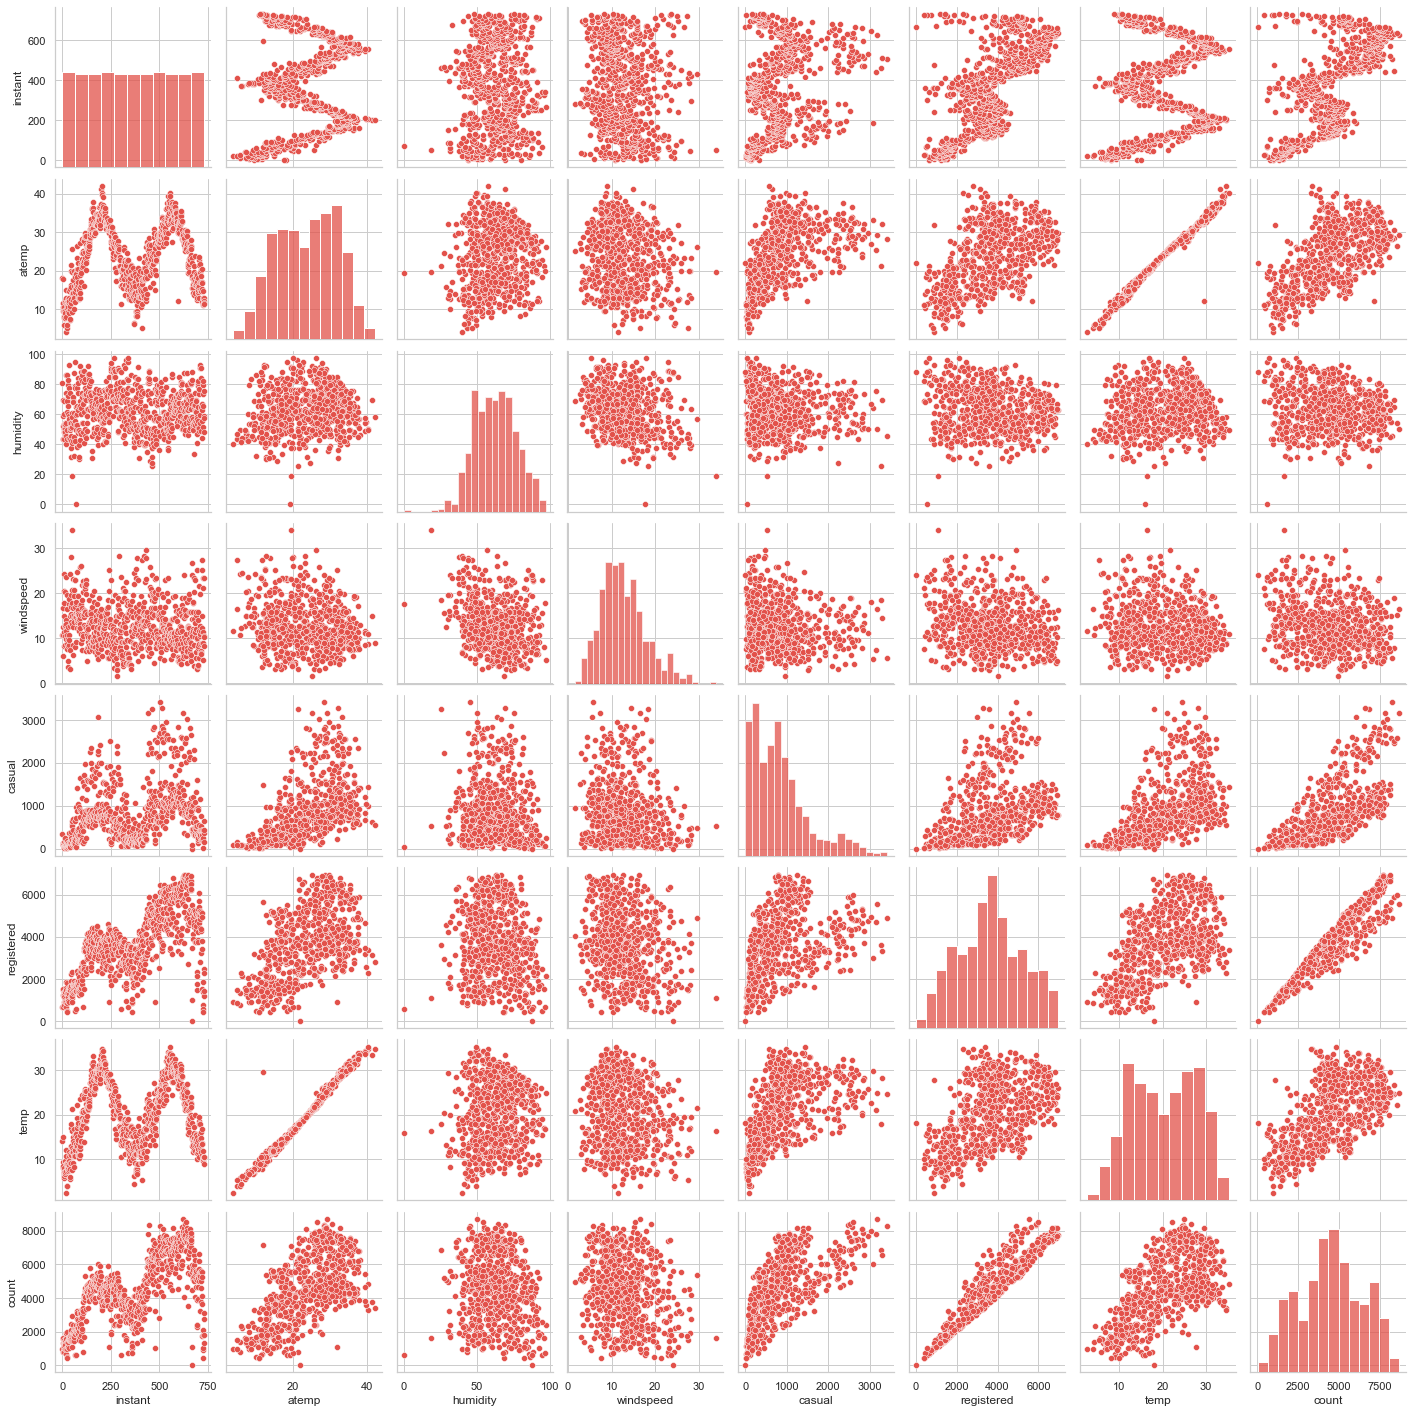

In [290]:
# Pairplot for numeric variables.
sns.pairplot(bike, vars=['instant','atemp','humidity','windspeed','casual','registered','temp','count'],  palette ="Spectral")
plt.show()

### Visualising Categorical Variables :-

#### SUBPLOT

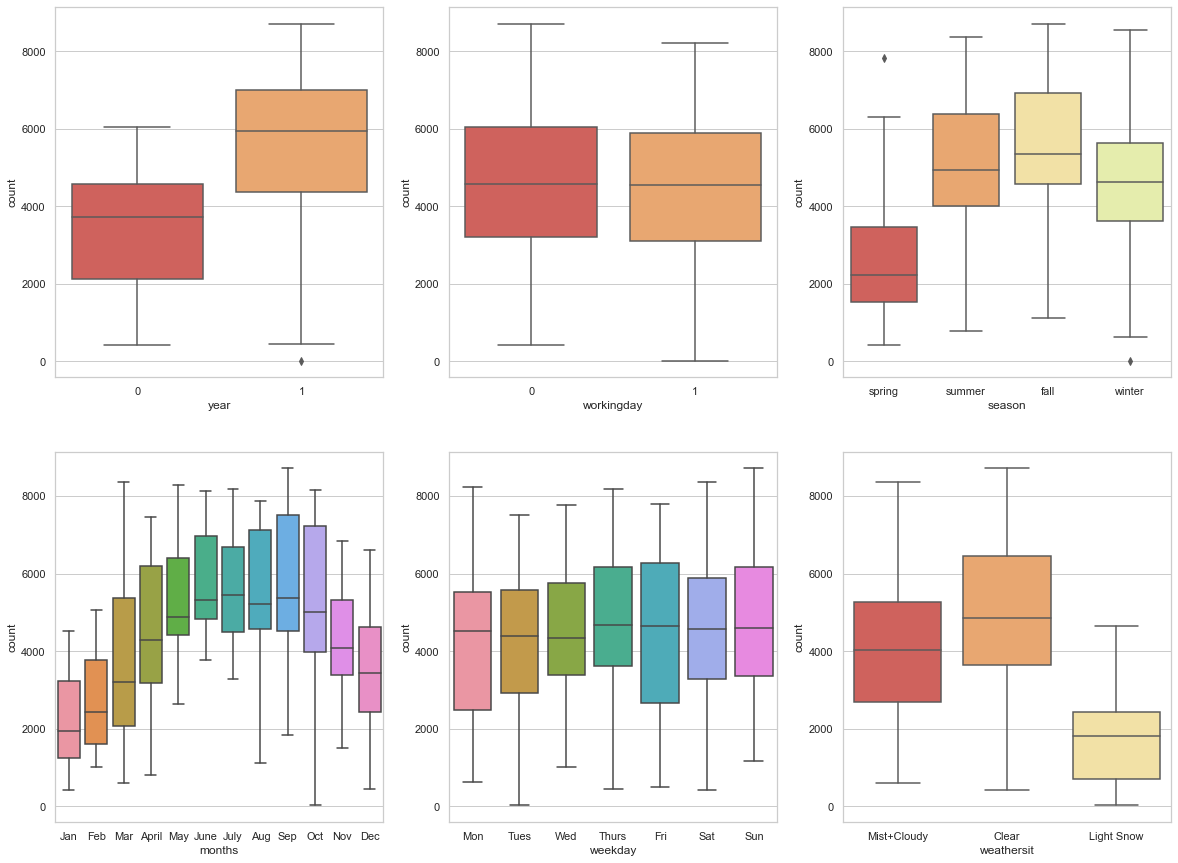

In [291]:
# Visualising Categorical Varaible.
# Subplot.
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'months', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.show()

### BAR PLOT

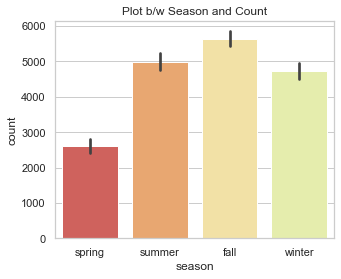

In [292]:
# BAR PlOT between Season And Count.
plt.figure(figsize = (5,4))
sns.set_theme(style = "whitegrid", palette ="Spectral")
sns.barplot(x = 'season', y = 'count', data = bike)
plt.title("Plot b/w Season and Count")
plt.show()

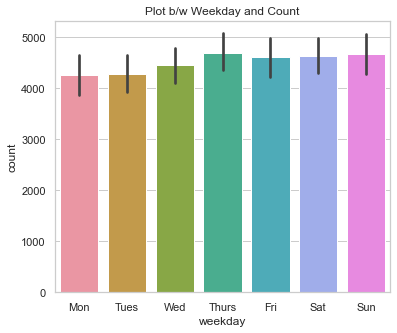

In [293]:
# BAR PlOT between Weekday And Count.
plt.figure(figsize = (6,5))
sns.set_theme(style = "whitegrid", palette ="Spectral" )
sns.barplot(x = 'weekday', y = 'count', data = bike)
plt.title("Plot b/w Weekday and Count")
plt.show()

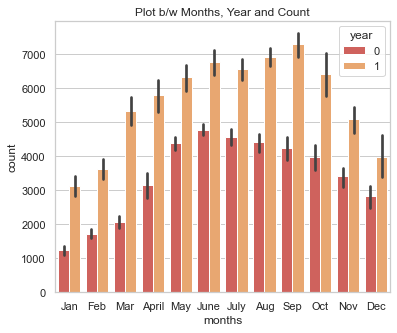

In [294]:
# BAR PlOT between Months And Count.
plt.figure(figsize = (6,5))
sns.set_theme(style = "whitegrid", palette = "Spectral" )
sns.barplot(x = 'months', y = 'count', data = bike, hue = 'year')
plt.title("Plot b/w Months, Year and Count")
plt.show()

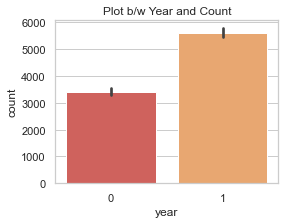

In [295]:
# BAR PlOT between Year And Count.
plt.figure(figsize = (4,3))
sns.set_theme(style = "whitegrid", palette = "Spectral" )
sns.barplot(x = 'year', y = 'count', data = bike)
plt.title("Plot b/w Year and Count")
plt.show()

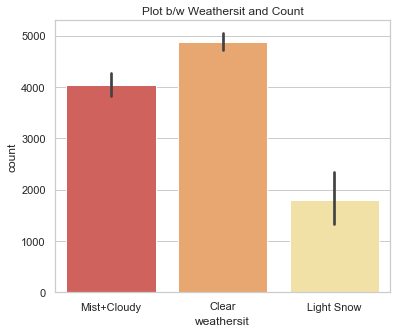

In [296]:
# BAR PlOT between Weathersit and Count.
plt.figure(figsize = (6,5))
sns.set_theme(style = "whitegrid", palette = "Spectral" )
sns.barplot(x = 'weathersit', y = 'count', data = bike)
plt.title("Plot b/w Weathersit and Count")
plt.show()

### SCATTER PLOT

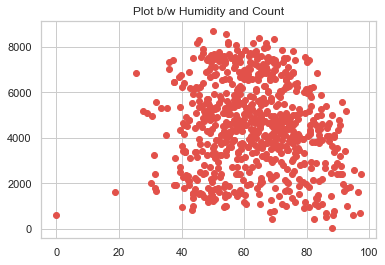

In [297]:
# SCATTER PlOT between Humidity And Count.
plt.scatter(x = 'humidity', y = 'count', data = bike)
plt.title("Plot b/w Humidity and Count")
plt.show()

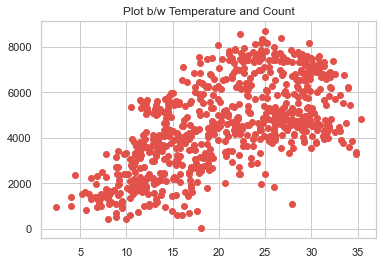

In [298]:
# SCATTER PlOT between Temp And Count.
plt.scatter(x = 'temp', y = 'count', data = bike)
plt.title("Plot b/w Temperature and Count")
plt.show()

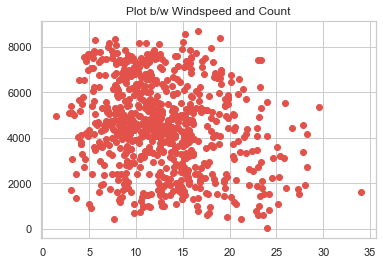

In [299]:
# SCATTER PlOT between windspeed And Count.
plt.scatter(x = 'windspeed', y = 'count', data = bike)
plt.title("Plot b/w Windspeed and Count")
plt.show()

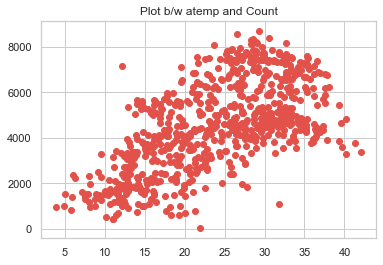

In [300]:
# SCATTER PlOT between atemp And Count.
plt.scatter(x = 'atemp', y = 'count', data = bike)
plt.title("Plot b/w atemp and Count")
plt.show()

### HEATMAP

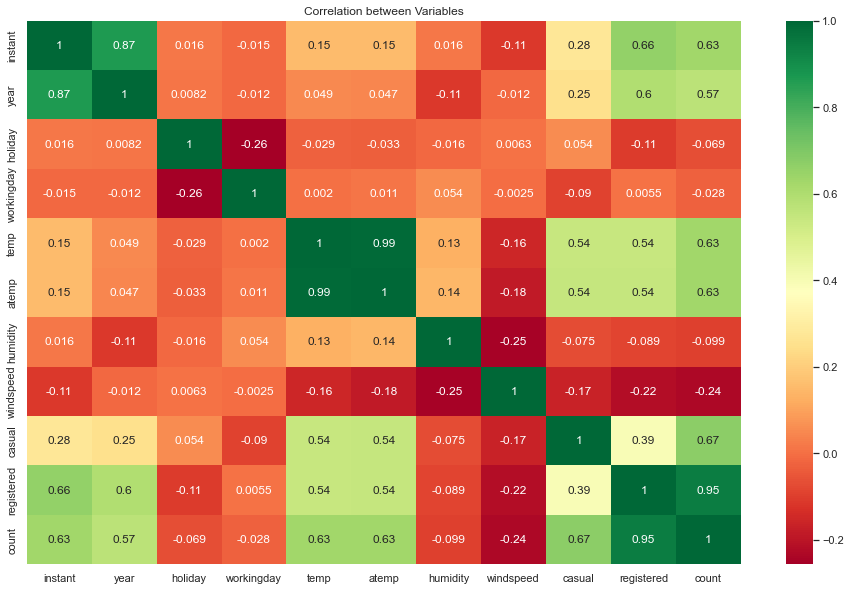

In [301]:
# Heatmap to see correlation between variables
plt.figure(figsize =(16,10))
sns.heatmap(bike.corr(),annot = True,cmap='RdYlGn')
plt.title("Correlation between Variables")
plt.show()

#### Drop the unnecessary variables from the dataset :-

In [302]:
# Drop unnecessary columns.
bike = bike.drop(['instant','date','casual', 'registered','atemp'], axis=1)
bike.head()

,season,year,months,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


###### Check the datatypes

In [303]:
# Checking datatypes of all the columns.
bike.dtypes

season         object
year            int64
months         object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## Step 3: Data Preparation

### 1. Dummy variables.

In [304]:
# Get the Dummy Variable for 'Season','Month','Weathersit','Weekday' Columns.
# Let's Drop the First Column from each
months = pd.get_dummies(bike.months, drop_first=True)
weekday = pd.get_dummies(bike.weekday, drop_first=True)
weathersit = pd.get_dummies(bike.weathersit, drop_first=True)
season = pd.get_dummies(bike.season, drop_first=True)

In [305]:
# Add the results to the original bike dataframe
bike = pd.concat([months, weekday, weathersit, season, bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,months,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tues,1,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [306]:
# Drop 'Season','Month','Weekday','Weathersit' as we have created the dummies for it.
bike.drop(['season','months','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [307]:
#Number of rows and columns
bike.shape

(730, 29)

In [308]:
# Total number of rows and columns.
bike.size

21170

In [309]:
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Light Snow',
       'Mist+Cloudy', 'spring', 'summer', 'winter', 'year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

#### HEATMAP

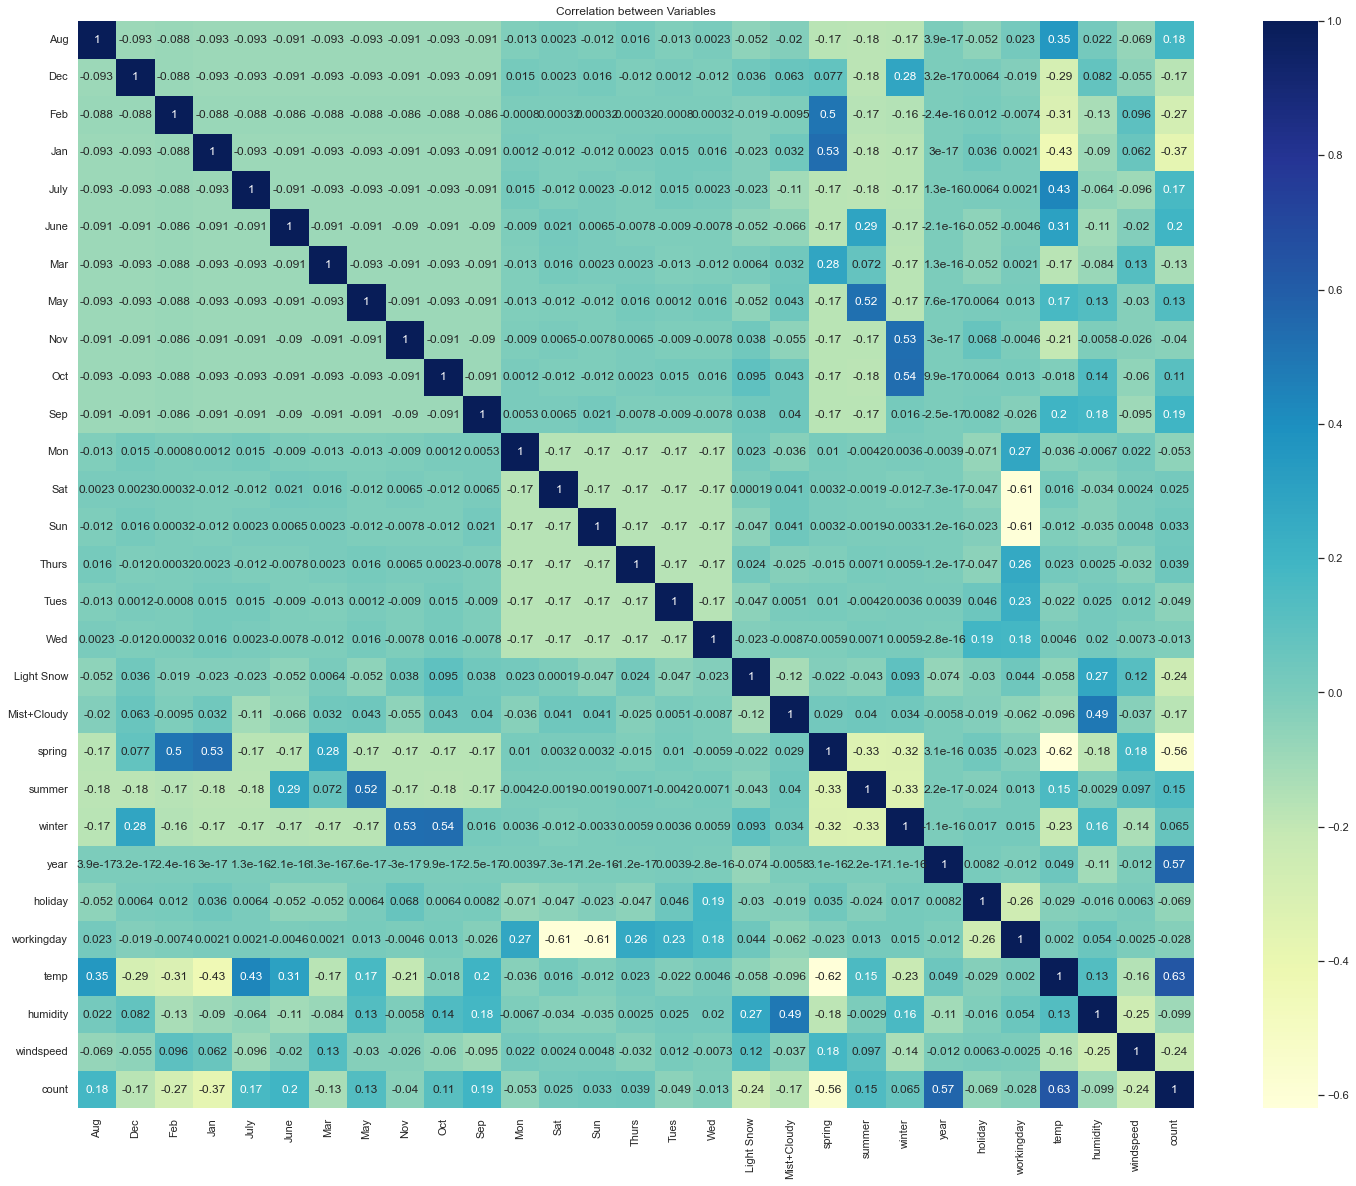

In [310]:
# Now lets check the correlation between variables again.
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

### 2. Split the Data into Training and Testing Sets.

In [311]:
# We specify this so that the train and test data set always have the same rows and same columns.
df_train, df_test = train_test_split(bike,train_size = 0.7, test_size = 0.3,random_state=100)

In [312]:
#Rows and columns after split.
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### 3. Rescaling of Variables.

In [313]:
# Rescaling of Variables using (MinMaxScaling(Normalisation); B/W 0 and 1)
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables.
num_vars = ['temp','humidity','windspeed','count']

#Fit on data.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [314]:
# Checking numeric variables(min and max) after scaling.
df_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.243137,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.429398,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### HEATMAP.

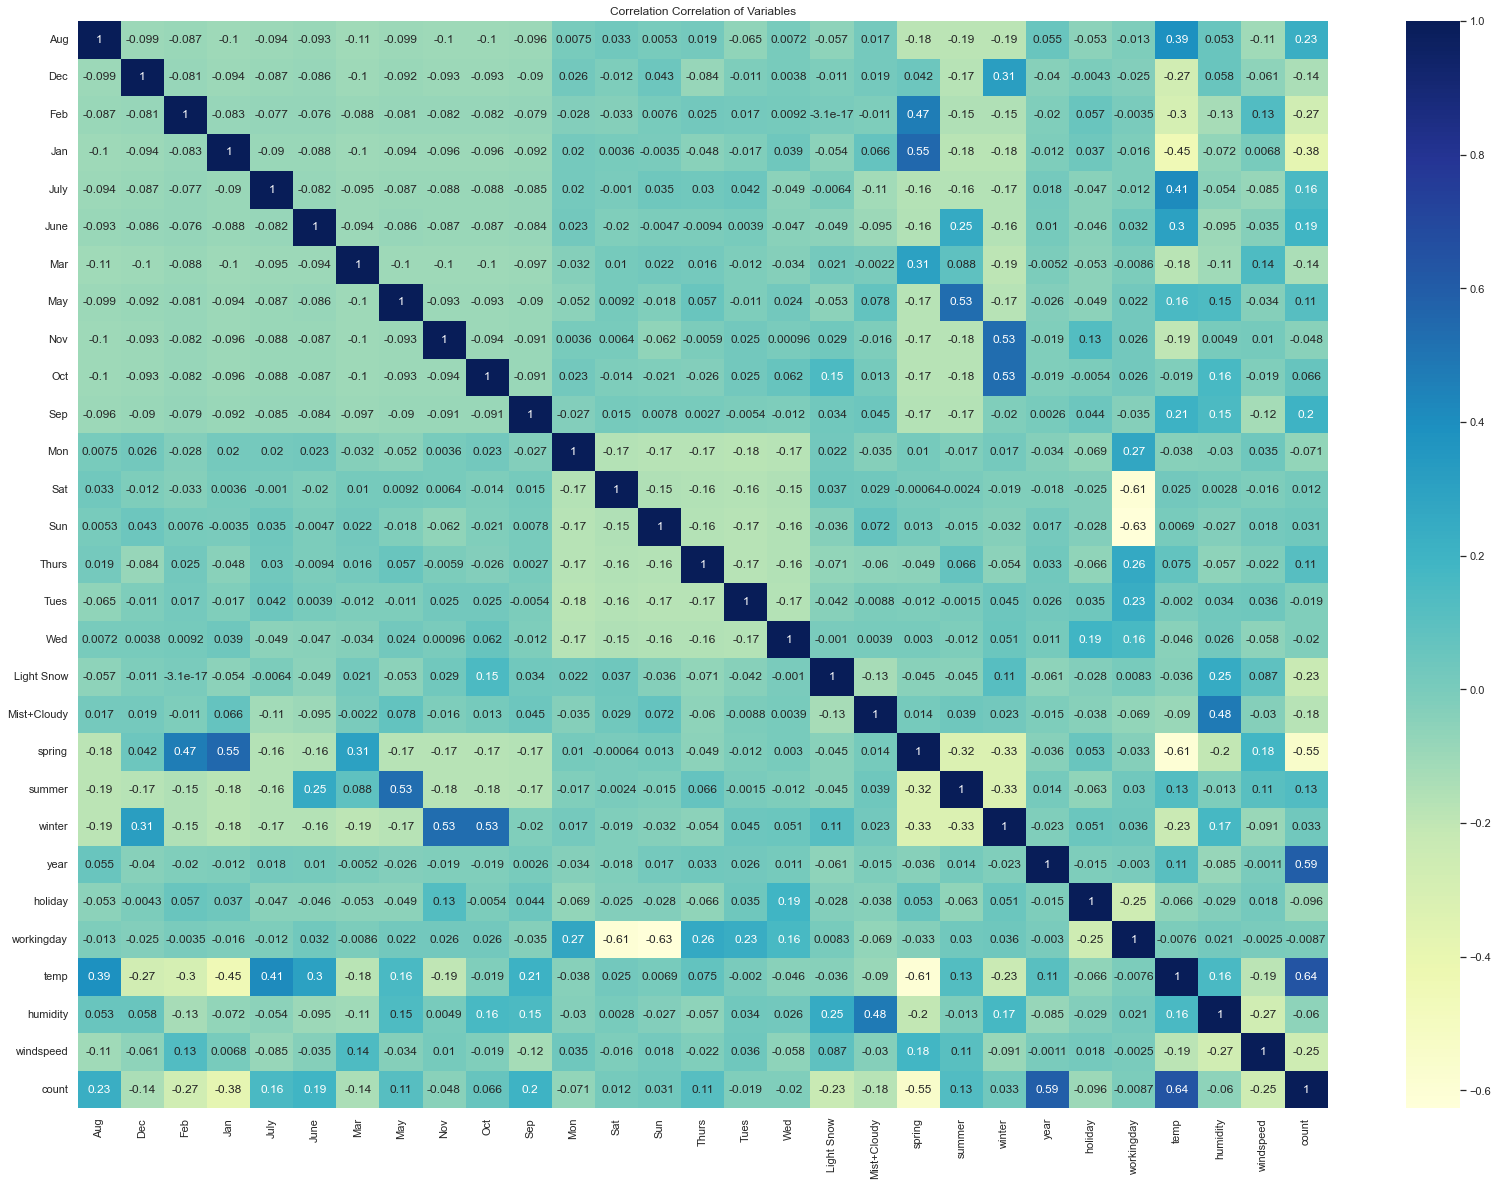

In [315]:
# # Let's check the correlation coefficients to see which variables are highly correlated after scaling.
plt.figure(figsize=(28, 20))
sns.heatmap(df_train.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Correlation of Variables")
plt.show()

In [316]:
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [317]:
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,19.270000,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,29.315000,30.5000,19.583229,4968


## Step 4: Building a linear mode.

###### Start with all the variable  and remove 'one by one'.

In [318]:
# Divide the data into X and y.
X_train= df_train
y_train = df_train.pop('count')

In [319]:
# Add constant to all the variable.
X_train_sm = sm.add_constant(X_train)

# Create a (model: 1)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.394543
Aug            0.021507
Dec           -0.045669
Feb           -0.037279
Jan           -0.063612
July          -0.034910
June           0.000975
Mar            0.000608
May            0.024064
Nov           -0.041555
Oct            0.005790
Sep            0.086055
Mon           -0.024633
Sat           -0.056319
Sun           -0.049961
Thurs          0.003863
Tues          -0.026299
Wed           -0.011241
Light Snow    -0.251511
Mist+Cloudy   -0.059355
spring        -0.043705
summer         0.042243
winter         0.110897
year           0.230857
holiday       -0.135424
workingday    -0.060524
temp           0.445458
humidity      -0.157315
windspeed     -0.183046
dtype: float64

In [320]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.33e-179
Time:                        15:47:05   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3945      0.085      4.640      0.000       0.227       0.562
Aug             0.0215      0.034      0.632      0.527      -0.045       0.088
Dec            -0.0457      0.034     -1.348      0.178      -0.112       0.021
Feb            -0.0373      0.033     -1.121      0.263      -0.103       0.028
Jan            -0.0636      0.034     -1.880      0.061      -0.130       0.003
July           -0.0349      0.035     -0.985      0.325      -0.105       0.035
June            0.0010      0.025      0.038      0.969      -0.049       0.051
Mar             0.0006      0.025      0.025      0.980      -0.048       0.049
May             0.0241      0.021      1.134      0.257      -0.018       0.066
Nov            -0.0416      0.037     -1.133      0.258      -0.114       0.031
Oct             0.0058      0.036      0.160      0.873      -0.065       0.077
Sep             0.0861      0.032      2.667      0.008       0.023       0.149
Mon            -0.0246      0.015     -1.690      0.092      -0.053       0.004
Sat            -0.0563      0.072     -0.787      0.432      -0.197       0.084
Sun            -0.0500      0.071     -0.699      0.485      -0.190       0.091
Thurs           0.0039      0.015      0.258      0.796      -0.026       0.033
Tues           -0.0263      0.015     -1.792      0.074      -0.055       0.003
Wed            -0.0112      0.015     -0.736      0.462      -0.041       0.019
Light Snow     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
Mist+Cloudy    -0.0594      0.011     -5.637      0.000      -0.080      -0.039
spring         -0.0437      0.030     -1.444      0.149      -0.103       0.016
summer          0.0422      0.026      1.598      0.111      -0.010       0.094
winter          0.1109      0.028      3.938      0.000       0.056       0.166
year            0.2309      0.008     28.387      0.000       0.215       0.247
holiday        -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday     -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp            0.4455      0.047      9.513      0.000       0.353       0.537
humidity       -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed      -0.1830      0.026     -7.036      0.000      -0.234      -0.132
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
==============================================================================

Notes:
[1] Standard Errors assume that the covar

In [321]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday,63.89
25,temp,43.99
26,humidity,41.17
19,spring,13.54
21,winter,12.51
13,Sun,12.35
12,Sat,11.83
20,summer,9.84
8,Nov,7.16
9,Oct,6.96


In [322]:
# DROP "MARCH COLUMN BECAUSE IT HAS HIGH (P_VALUE) AND LOW (VIF)"
X = X_train.drop("Mar",axis=1)

# Add constant to all the variable.
X_train_sm = sm.add_constant(X)

#  Create a (model: 2)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model=lr.fit()
lr_model.params

const          0.394925
Aug            0.021231
Dec           -0.046195
Feb           -0.037881
Jan           -0.064232
July          -0.035171
June           0.000778
May            0.023881
Nov           -0.042033
Oct            0.005330
Sep            0.085726
Mon           -0.024651
Sat           -0.056313
Sun           -0.049949
Thurs          0.003866
Tues          -0.026310
Wed           -0.011247
Light Snow    -0.251506
Mist+Cloudy   -0.059359
spring        -0.043466
summer         0.042118
winter         0.111025
year           0.230856
holiday       -0.135422
workingday    -0.060513
temp           0.445267
humidity      -0.157239
windspeed     -0.183076
dtype: float64

In [323]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.24e-180
Time:                        15:47:09   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3949      0.084      4.729      0.000       0.231       0.559
Aug             0.0212      0.032      0.662      0.508      -0.042       0.084
Dec            -0.0462      0.026     -1.762      0.079      -0.098       0.005
Feb            -0.0379      0.022     -1.687      0.092      -0.082       0.006
Jan            -0.0642      0.023     -2.852      0.005      -0.108      -0.020
July           -0.0352      0.034     -1.041      0.298      -0.102       0.031
June            0.0008      0.024      0.032      0.974      -0.046       0.048
May             0.0239      0.020      1.204      0.229      -0.015       0.063
Nov            -0.0420      0.031     -1.354      0.176      -0.103       0.019
Oct             0.0053      0.031      0.173      0.863      -0.055       0.066
Sep             0.0857      0.029      2.924      0.004       0.028       0.143
Mon            -0.0247      0.015     -1.695      0.091      -0.053       0.004
Sat            -0.0563      0.072     -0.788      0.431      -0.197       0.084
Sun            -0.0499      0.071     -0.699      0.485      -0.190       0.090
Thurs           0.0039      0.015      0.259      0.796      -0.025       0.033
Tues           -0.0263      0.015     -1.796      0.073      -0.055       0.002
Wed            -0.0112      0.015     -0.737      0.461      -0.041       0.019
Light Snow     -0.2515      0.027     -9.465      0.000      -0.304      -0.199
Mist+Cloudy    -0.0594      0.011     -5.643      0.000      -0.080      -0.039
spring         -0.0435      0.029     -1.519      0.130      -0.100       0.013
summer          0.0421      0.026      1.625      0.105      -0.009       0.093
winter          0.1110      0.028      4.016      0.000       0.057       0.165
year            0.2309      0.008     28.416      0.000       0.215       0.247
holiday        -0.1354      0.065     -2.074      0.039      -0.264      -0.007
workingday     -0.0605      0.071     -0.853      0.394      -0.200       0.079
temp            0.4453      0.046      9.653      0.000       0.355       0.536
humidity       -0.1572      0.039     -4.064      0.000      -0.233      -0.081
windspeed      -0.1831      0.026     -7.052      0.000      -0.234      -0.132
==============================================================================
Omnibus:                       78.874   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.108
Skew:                          -0.768   Prob(JB):                     3.92e-46
Kurtosis:                       5.735   Cond. No.                         70.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,workingday,57.64
24,temp,43.34
25,humidity,40.56
20,winter,11.96
18,spring,11.60
12,Sun,11.11
11,Sat,10.72
19,summer,9.64
0,Aug,6.21
26,windspeed,5.59


In [325]:
# DROP "JUNE COLUMN BECAUSE IT HAS HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("June", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 3)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.394989
Aug            0.020585
Dec           -0.046266
Feb           -0.037820
Jan           -0.064118
July          -0.035867
May            0.023580
Nov           -0.042186
Oct            0.005081
Sep            0.085209
Mon           -0.024630
Sat           -0.056260
Sun           -0.049891
Thurs          0.003841
Tues          -0.026311
Wed           -0.011254
Light Snow    -0.251496
Mist+Cloudy   -0.059346
spring        -0.043759
summer         0.041902
winter         0.110860
year           0.230829
holiday       -0.135409
workingday    -0.060447
temp           0.446066
humidity      -0.157372
windspeed     -0.183159
dtype: float64

In [326]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.08e-181
Time:                        15:47:12   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     483   BIC:                            -879.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3950      0.083      4.736      0.000       0.231       0.559
Aug             0.0206      0.025      0.820      0.413      -0.029       0.070
Dec            -0.0463      0.026     -1.773      0.077      -0.098       0.005
Feb            -0.0378      0.022     -1.692      0.091      -0.082       0.006
Jan            -0.0641      0.022     -2.885      0.004      -0.108      -0.020
July           -0.0359      0.026     -1.378      0.169      -0.087       0.015
May             0.0236      0.018      1.346      0.179      -0.011       0.058
Nov            -0.0422      0.031     -1.376      0.169      -0.102       0.018
Oct             0.0051      0.030      0.170      0.865      -0.054       0.064
Sep             0.0852      0.025      3.466      0.001       0.037       0.134
Mon            -0.0246      0.015     -1.697      0.090      -0.053       0.004
Sat            -0.0563      0.071     -0.788      0.431      -0.197       0.084
Sun            -0.0499      0.071     -0.700      0.485      -0.190       0.090
Thurs           0.0038      0.015      0.258      0.797      -0.025       0.033
Tues           -0.0263      0.015     -1.798      0.073      -0.055       0.002
Wed            -0.0113      0.015     -0.739      0.461      -0.041       0.019
Light Snow     -0.2515      0.027     -9.475      0.000      -0.304      -0.199
Mist+Cloudy    -0.0593      0.011     -5.652      0.000      -0.080      -0.039
spring         -0.0438      0.027     -1.613      0.107      -0.097       0.010
summer          0.0419      0.025      1.675      0.095      -0.007       0.091
winter          0.1109      0.027      4.084      0.000       0.058       0.164
year            0.2308      0.008     28.587      0.000       0.215       0.247
holiday        -0.1354      0.065     -2.076      0.038      -0.264      -0.007
workingday     -0.0604      0.071     -0.853      0.394      -0.200       0.079
temp            0.4461      0.039     11.449      0.000       0.370       0.523
humidity       -0.1574      0.038     -4.095      0.000      -0.233      -0.082
windspeed      -0.1832      0.026     -7.097      0.000      -0.234      -0.132
==============================================================================
Omnibus:                       78.804   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.608
Skew:                          -0.768   Prob(JB):                     5.03e-46
Kurtosis:                       5.731   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,workingday,57.09
24,humidity,40.13
23,temp,29.80
19,winter,11.56
11,Sun,11.02
10,Sat,10.64
17,spring,10.38
18,summer,8.98
25,windspeed,5.54
6,Nov,5.15


In [328]:
# DROP "OCTOBER COLUMN BECAUSE IT HAS HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("Oct", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 4)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.396542
Aug            0.019253
Dec           -0.049422
Feb           -0.038785
Jan           -0.065121
July          -0.037144
May            0.023585
Nov           -0.046261
Sep            0.083214
Mon           -0.024515
Sat           -0.056575
Sun           -0.050262
Thurs          0.003897
Tues          -0.026312
Wed           -0.011189
Light Snow    -0.251409
Mist+Cloudy   -0.059421
spring        -0.044407
summer         0.040441
winter         0.113345
year           0.230799
holiday       -0.135371
workingday    -0.060858
temp           0.445500
humidity      -0.156546
windspeed     -0.182869
dtype: float64

In [329]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          3.90e-182
Time:                        15:47:15   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3965      0.083      4.788      0.000       0.234       0.559
Aug             0.0193      0.024      0.808      0.419      -0.028       0.066
Dec            -0.0494      0.018     -2.696      0.007      -0.085      -0.013
Feb            -0.0388      0.022     -1.795      0.073      -0.081       0.004
Jan            -0.0651      0.021     -3.042      0.002      -0.107      -0.023
July           -0.0371      0.025     -1.492      0.136      -0.086       0.012
May             0.0236      0.017      1.348      0.178      -0.011       0.058
Nov            -0.0463      0.019     -2.421      0.016      -0.084      -0.009
Sep             0.0832      0.022      3.855      0.000       0.041       0.126
Mon            -0.0245      0.014     -1.693      0.091      -0.053       0.004
Sat            -0.0566      0.071     -0.793      0.428      -0.197       0.084
Sun            -0.0503      0.071     -0.706      0.481      -0.190       0.090
Thurs           0.0039      0.015      0.262      0.794      -0.025       0.033
Tues           -0.0263      0.015     -1.800      0.073      -0.055       0.002
Wed            -0.0112      0.015     -0.735      0.463      -0.041       0.019
Light Snow     -0.2514      0.027     -9.483      0.000      -0.303      -0.199
Mist+Cloudy    -0.0594      0.010     -5.670      0.000      -0.080      -0.039
spring         -0.0444      0.027     -1.655      0.099      -0.097       0.008
summer          0.0404      0.023      1.722      0.086      -0.006       0.087
winter          0.1133      0.023      4.959      0.000       0.068       0.158
year            0.2308      0.008     28.619      0.000       0.215       0.247
holiday        -0.1354      0.065     -2.078      0.038      -0.263      -0.007
workingday     -0.0609      0.071     -0.860      0.390      -0.200       0.078
temp            0.4455      0.039     11.488      0.000       0.369       0.522
humidity       -0.1565      0.038     -4.110      0.000      -0.231      -0.082
windspeed      -0.1829      0.026     -7.108      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       78.293   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.411
Skew:                          -0.764   Prob(JB):                     1.51e-45
Kurtosis:                       5.716   Cond. No.                         70.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,workingday,56.23
23,humidity,39.16
22,temp,29.71
10,Sun,10.83
9,Sat,10.44
16,spring,10.25
17,summer,8.02
18,winter,7.89
24,windspeed,5.50
0,Aug,3.45


In [331]:
# DROP "THURSDAY COLUMN BECAUSE IT HAS HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("Thurs", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 5)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.398493
Aug            0.019483
Dec           -0.049737
Feb           -0.038613
Jan           -0.065166
July          -0.036700
May            0.023693
Nov           -0.046448
Sep            0.083342
Mon           -0.026433
Sat           -0.058335
Sun           -0.052044
Tues          -0.028255
Wed           -0.013103
Light Snow    -0.252062
Mist+Cloudy   -0.059505
spring        -0.044424
summer         0.040658
winter         0.113583
year           0.230866
holiday       -0.135360
workingday    -0.060711
temp           0.445279
humidity      -0.156795
windspeed     -0.182950
dtype: float64

In [332]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          3.71e-183
Time:                        15:47:18   Log-Likelihood:                 523.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     485   BIC:                            -891.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3985      0.082      4.836      0.000       0.237       0.560
Aug             0.0195      0.024      0.819      0.413      -0.027       0.066
Dec            -0.0497      0.018     -2.722      0.007      -0.086      -0.014
Feb            -0.0386      0.022     -1.790      0.074      -0.081       0.004
Jan            -0.0652      0.021     -3.047      0.002      -0.107      -0.023
July           -0.0367      0.025     -1.479      0.140      -0.085       0.012
May             0.0237      0.017      1.356      0.176      -0.011       0.058
Nov            -0.0464      0.019     -2.435      0.015      -0.084      -0.009
Sep             0.0833      0.022      3.866      0.000       0.041       0.126
Mon            -0.0264      0.012     -2.118      0.035      -0.051      -0.002
Sat            -0.0583      0.071     -0.822      0.411      -0.198       0.081
Sun            -0.0520      0.071     -0.735      0.463      -0.191       0.087
Tues           -0.0283      0.013     -2.245      0.025      -0.053      -0.004
Wed            -0.0131      0.013     -0.983      0.326      -0.039       0.013
Light Snow     -0.2521      0.026     -9.560      0.000      -0.304      -0.200
Mist+Cloudy    -0.0595      0.010     -5.686      0.000      -0.080      -0.039
spring         -0.0444      0.027     -1.657      0.098      -0.097       0.008
summer          0.0407      0.023      1.734      0.083      -0.005       0.087
winter          0.1136      0.023      4.978      0.000       0.069       0.158
year            0.2309      0.008     28.669      0.000       0.215       0.247
holiday        -0.1354      0.065     -2.080      0.038      -0.263      -0.007
workingday     -0.0607      0.071     -0.859      0.391      -0.200       0.078
temp            0.4453      0.039     11.496      0.000       0.369       0.521
humidity       -0.1568      0.038     -4.122      0.000      -0.232      -0.082
windspeed      -0.1830      0.026     -7.118      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       78.598   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.793
Skew:                          -0.766   Prob(JB):                     7.56e-46
Kurtosis:                       5.726   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,workingday,54.51
22,humidity,39.16
21,temp,29.71
10,Sun,10.82
9,Sat,10.43
15,spring,10.24
16,summer,7.98
17,winter,7.86
23,windspeed,5.50
0,Aug,3.44


In [334]:
# DROP "SUNDAY COLUMN BECAUSE IT HAS HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("Sun", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 6)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.345810
Aug            0.019128
Dec           -0.049478
Feb           -0.038224
Jan           -0.064934
July          -0.037090
May            0.023383
Nov           -0.047709
Sep            0.083472
Mon           -0.025876
Sat           -0.007428
Tues          -0.027423
Wed           -0.011787
Light Snow    -0.251889
Mist+Cloudy   -0.059492
spring        -0.044108
summer         0.040742
winter         0.113338
year           0.231212
holiday       -0.092353
workingday    -0.009666
temp           0.446132
humidity      -0.155664
windspeed     -0.183462
dtype: float64

In [335]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.37e-184
Time:                        15:47:21   Log-Likelihood:                 523.47
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     486   BIC:                            -897.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3458      0.041      8.513      0.000       0.266       0.426
Aug             0.0191      0.024      0.805      0.421      -0.028       0.066
Dec            -0.0495      0.018     -2.710      0.007      -0.085      -0.014
Feb            -0.0382      0.022     -1.773      0.077      -0.081       0.004
Jan            -0.0649      0.021     -3.038      0.003      -0.107      -0.023
July           -0.0371      0.025     -1.496      0.135      -0.086       0.012
May             0.0234      0.017      1.339      0.181      -0.011       0.058
Nov            -0.0477      0.019     -2.512      0.012      -0.085      -0.010
Sep             0.0835      0.022      3.874      0.000       0.041       0.126
Mon            -0.0259      0.012     -2.078      0.038      -0.050      -0.001
Sat            -0.0074      0.015     -0.487      0.626      -0.037       0.023
Tues           -0.0274      0.013     -2.189      0.029      -0.052      -0.003
Wed            -0.0118      0.013     -0.893      0.373      -0.038       0.014
Light Snow     -0.2519      0.026     -9.558      0.000      -0.304      -0.200
Mist+Cloudy    -0.0595      0.010     -5.687      0.000      -0.080      -0.039
spring         -0.0441      0.027     -1.646      0.100      -0.097       0.009
summer          0.0407      0.023      1.739      0.083      -0.005       0.087
winter          0.1133      0.023      4.970      0.000       0.069       0.158
year            0.2312      0.008     28.775      0.000       0.215       0.247
holiday        -0.0924      0.028     -3.244      0.001      -0.148      -0.036
workingday     -0.0097      0.013     -0.744      0.457      -0.035       0.016
temp            0.4461      0.039     11.529      0.000       0.370       0.522
humidity       -0.1557      0.038     -4.098      0.000      -0.230      -0.081
windspeed      -0.1835      0.026     -7.144      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       78.549   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.045
Skew:                          -0.771   Prob(JB):                     4.92e-45
Kurtosis:                       5.687   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [336]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,humidity,34.38
20,temp,21.84
19,workingday,7.46
14,spring,7.37
16,winter,6.01
15,summer,5.84
22,windspeed,4.96
0,Aug,3.14
4,July,2.79
3,Jan,2.42


In [337]:
# DROP "SATURDAY COLUMN BECAUSE IT HAS HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("Sat", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 7)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.342517
Aug            0.018797
Dec           -0.049315
Feb           -0.037972
Jan           -0.064948
July          -0.037090
May            0.023283
Nov           -0.048218
Sep            0.083289
Mon           -0.025858
Tues          -0.027409
Wed           -0.011713
Light Snow    -0.252424
Mist+Cloudy   -0.059368
spring        -0.044550
summer         0.040443
winter         0.113113
year           0.231328
holiday       -0.089268
workingday    -0.006055
temp           0.445782
humidity      -0.155689
windspeed     -0.183175
dtype: float64

In [338]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.1
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.32e-185
Time:                        15:47:24   Log-Likelihood:                 523.35
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3425      0.040      8.557      0.000       0.264       0.421
Aug             0.0188      0.024      0.792      0.429      -0.028       0.065
Dec            -0.0493      0.018     -2.703      0.007      -0.085      -0.013
Feb            -0.0380      0.022     -1.764      0.078      -0.080       0.004
Jan            -0.0649      0.021     -3.041      0.002      -0.107      -0.023
July           -0.0371      0.025     -1.497      0.135      -0.086       0.012
May             0.0233      0.017      1.335      0.183      -0.011       0.058
Nov            -0.0482      0.019     -2.545      0.011      -0.085      -0.011
Sep             0.0833      0.022      3.869      0.000       0.041       0.126
Mon            -0.0259      0.012     -2.078      0.038      -0.050      -0.001
Tues           -0.0274      0.013     -2.190      0.029      -0.052      -0.003
Wed            -0.0117      0.013     -0.888      0.375      -0.038       0.014
Light Snow     -0.2524      0.026     -9.594      0.000      -0.304      -0.201
Mist+Cloudy    -0.0594      0.010     -5.682      0.000      -0.080      -0.039
spring         -0.0445      0.027     -1.665      0.097      -0.097       0.008
summer          0.0404      0.023      1.728      0.085      -0.006       0.086
winter          0.1131      0.023      4.965      0.000       0.068       0.158
year            0.2313      0.008     28.824      0.000       0.216       0.247
holiday        -0.0893      0.028     -3.218      0.001      -0.144      -0.035
workingday     -0.0061      0.011     -0.568      0.571      -0.027       0.015
temp            0.4458      0.039     11.531      0.000       0.370       0.522
humidity       -0.1557      0.038     -4.101      0.000      -0.230      -0.081
windspeed      -0.1832      0.026     -7.141      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       77.413   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.812
Skew:                          -0.761   Prob(JB):                     2.48e-44
Kurtosis:                       5.671   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,humidity,34.17
19,temp,21.39
13,spring,7.17
15,winter,5.91
14,summer,5.71
18,workingday,5.15
21,windspeed,4.95
0,Aug,3.12
4,July,2.78
3,Jan,2.41


In [340]:
# DROP "WORKINGAY COLUMN BECAUSE HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("workingday", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 8
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.339552
Aug            0.019205
Dec           -0.049100
Feb           -0.038283
Jan           -0.064963
July          -0.036401
May            0.023207
Nov           -0.048812
Sep            0.083572
Mon           -0.028729
Tues          -0.030222
Wed           -0.014506
Light Snow    -0.252102
Mist+Cloudy   -0.058810
spring        -0.044196
summer         0.040629
winter         0.113491
year           0.231356
holiday       -0.083722
temp           0.445721
humidity      -0.156758
windspeed     -0.183172
dtype: float64

In [341]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.36e-186
Time:                        15:47:27   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -909.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3396      0.040      8.562      0.000       0.262       0.417
Aug             0.0192      0.024      0.810      0.418      -0.027       0.066
Dec            -0.0491      0.018     -2.694      0.007      -0.085      -0.013
Feb            -0.0383      0.022     -1.780      0.076      -0.081       0.004
Jan            -0.0650      0.021     -3.044      0.002      -0.107      -0.023
July           -0.0364      0.025     -1.472      0.142      -0.085       0.012
May             0.0232      0.017      1.331      0.184      -0.011       0.057
Nov            -0.0488      0.019     -2.582      0.010      -0.086      -0.012
Sep             0.0836      0.022      3.886      0.000       0.041       0.126
Mon            -0.0287      0.011     -2.529      0.012      -0.051      -0.006
Tues           -0.0302      0.011     -2.631      0.009      -0.053      -0.008
Wed            -0.0145      0.012     -1.186      0.236      -0.039       0.010
Light Snow     -0.2521      0.026     -9.591      0.000      -0.304      -0.200
Mist+Cloudy    -0.0588      0.010     -5.657      0.000      -0.079      -0.038
spring         -0.0442      0.027     -1.654      0.099      -0.097       0.008
summer          0.0406      0.023      1.737      0.083      -0.005       0.087
winter          0.1135      0.023      4.987      0.000       0.069       0.158
year            0.2314      0.008     28.848      0.000       0.216       0.247
holiday        -0.0837      0.026     -3.227      0.001      -0.135      -0.033
temp            0.4457      0.039     11.537      0.000       0.370       0.522
humidity       -0.1568      0.038     -4.138      0.000      -0.231      -0.082
windspeed      -0.1832      0.026     -7.146      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       75.945   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.838
Skew:                          -0.744   Prob(JB):                     6.65e-44
Kurtosis:                       5.672   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,humidity,33.71
18,temp,21.18
13,spring,7.14
15,winter,5.90
14,summer,5.67
20,windspeed,4.94
0,Aug,3.12
4,July,2.78
3,Jan,2.41
12,Mist+Cloudy,2.34


In [343]:
# DROP "AUGUST COLUMN BECAUSE HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("Aug", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 9)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.350225
Dec           -0.050007
Feb           -0.038266
Jan           -0.064946
July          -0.050053
May            0.022757
Nov           -0.049996
Sep            0.072637
Mon           -0.028427
Tues          -0.030375
Wed           -0.014298
Light Snow    -0.253127
Mist+Cloudy   -0.058474
spring        -0.056441
summer         0.027677
winter         0.102111
year           0.231538
holiday       -0.084263
temp           0.448080
humidity      -0.155431
windspeed     -0.183331
dtype: float64

In [344]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          5.05e-187
Time:                        15:47:31   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -914.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3502      0.037      9.367      0.000       0.277       0.424
Dec            -0.0500      0.018     -2.750      0.006      -0.086      -0.014
Feb            -0.0383      0.022     -1.780      0.076      -0.081       0.004
Jan            -0.0649      0.021     -3.044      0.002      -0.107      -0.023
July           -0.0501      0.018     -2.767      0.006      -0.086      -0.015
May             0.0228      0.017      1.307      0.192      -0.011       0.057
Nov            -0.0500      0.019     -2.654      0.008      -0.087      -0.013
Sep             0.0726      0.017      4.341      0.000       0.040       0.106
Mon            -0.0284      0.011     -2.505      0.013      -0.051      -0.006
Tues           -0.0304      0.011     -2.645      0.008      -0.053      -0.008
Wed            -0.0143      0.012     -1.169      0.243      -0.038       0.010
Light Snow     -0.2531      0.026     -9.644      0.000      -0.305      -0.202
Mist+Cloudy    -0.0585      0.010     -5.631      0.000      -0.079      -0.038
spring         -0.0564      0.022     -2.561      0.011      -0.100      -0.013
summer          0.0277      0.017      1.623      0.105      -0.006       0.061
winter          0.1021      0.018      5.707      0.000       0.067       0.137
year            0.2315      0.008     28.893      0.000       0.216       0.247
holiday        -0.0843      0.026     -3.251      0.001      -0.135      -0.033
temp            0.4481      0.039     11.635      0.000       0.372       0.524
humidity       -0.1554      0.038     -4.108      0.000      -0.230      -0.081
windspeed      -0.1833      0.026     -7.154      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       77.067   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.505
Skew:                          -0.755   Prob(JB):                     1.75e-44
Kurtosis:                       5.683   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,humidity,32.10
17,temp,18.42
12,spring,5.45
19,windspeed,4.87
14,winter,4.10
13,summer,3.35
2,Jan,2.38
11,Mist+Cloudy,2.34
15,year,2.11
1,Feb,1.92


In [346]:
# DROP "WEDNESDAY COLUMN BECAUSE HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("Wed", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 10)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.346442
Dec           -0.049042
Feb           -0.038376
Jan           -0.065317
July          -0.049845
May            0.022141
Nov           -0.048363
Sep            0.073398
Mon           -0.025794
Tues          -0.027479
Light Snow    -0.252557
Mist+Cloudy   -0.058129
spring        -0.055447
summer         0.028185
winter         0.101509
year           0.231316
holiday       -0.090173
temp           0.450462
humidity      -0.156853
windspeed     -0.182245
dtype: float64

In [347]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          8.12e-188
Time:                        15:47:35   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3464      0.037      9.297      0.000       0.273       0.420
Dec            -0.0490      0.018     -2.698      0.007      -0.085      -0.013
Feb            -0.0384      0.022     -1.784      0.075      -0.081       0.004
Jan            -0.0653      0.021     -3.061      0.002      -0.107      -0.023
July           -0.0498      0.018     -2.754      0.006      -0.085      -0.014
May             0.0221      0.017      1.271      0.204      -0.012       0.056
Nov            -0.0484      0.019     -2.573      0.010      -0.085      -0.011
Sep             0.0734      0.017      4.388      0.000       0.041       0.106
Mon            -0.0258      0.011     -2.318      0.021      -0.048      -0.004
Tues           -0.0275      0.011     -2.450      0.015      -0.050      -0.005
Light Snow     -0.2526      0.026     -9.621      0.000      -0.304      -0.201
Mist+Cloudy    -0.0581      0.010     -5.598      0.000      -0.079      -0.038
spring         -0.0554      0.022     -2.517      0.012      -0.099      -0.012
summer          0.0282      0.017      1.652      0.099      -0.005       0.062
winter          0.1015      0.018      5.673      0.000       0.066       0.137
year            0.2313      0.008     28.862      0.000       0.216       0.247
holiday        -0.0902      0.025     -3.545      0.000      -0.140      -0.040
temp            0.4505      0.038     11.709      0.000       0.375       0.526
humidity       -0.1569      0.038     -4.146      0.000      -0.231      -0.083
windspeed      -0.1822      0.026     -7.114      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       75.657   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.065
Skew:                          -0.735   Prob(JB):                     1.32e-44
Kurtosis:                       5.711   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,humidity,31.88
16,temp,18.42
11,spring,5.45
18,windspeed,4.87
13,winter,4.08
12,summer,3.34
2,Jan,2.38
10,Mist+Cloudy,2.34
14,year,2.10
1,Feb,1.92


In [349]:
# DROP "MAY COLUMN BECAUSE HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("May", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 11)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.336676
Dec           -0.047759
Feb           -0.037036
Jan           -0.063709
July          -0.050237
Nov           -0.046774
Sep            0.073395
Mon           -0.026397
Tues          -0.027873
Light Snow    -0.254358
Mist+Cloudy   -0.058280
spring        -0.051768
summer         0.037733
winter         0.103543
year           0.230791
holiday       -0.091022
temp           0.459059
humidity      -0.150876
windspeed     -0.183848
dtype: float64

In [350]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          1.44e-188
Time:                        15:47:41   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3367      0.036      9.227      0.000       0.265       0.408
Dec            -0.0478      0.018     -2.630      0.009      -0.083      -0.012
Feb            -0.0370      0.021     -1.723      0.086      -0.079       0.005
Jan            -0.0637      0.021     -2.989      0.003      -0.106      -0.022
July           -0.0502      0.018     -2.775      0.006      -0.086      -0.015
Nov            -0.0468      0.019     -2.492      0.013      -0.084      -0.010
Sep             0.0734      0.017      4.385      0.000       0.041       0.106
Mon            -0.0264      0.011     -2.373      0.018      -0.048      -0.005
Tues           -0.0279      0.011     -2.484      0.013      -0.050      -0.006
Light Snow     -0.2544      0.026     -9.697      0.000      -0.306      -0.203
Mist+Cloudy    -0.0583      0.010     -5.610      0.000      -0.079      -0.038
spring         -0.0518      0.022     -2.369      0.018      -0.095      -0.009
summer          0.0377      0.015      2.462      0.014       0.008       0.068
winter          0.1035      0.018      5.807      0.000       0.069       0.139
year            0.2308      0.008     28.817      0.000       0.215       0.247
holiday        -0.0910      0.025     -3.578      0.000      -0.141      -0.041
temp            0.4591      0.038     12.114      0.000       0.385       0.534
humidity       -0.1509      0.038     -4.017      0.000      -0.225      -0.077
windspeed      -0.1838      0.026     -7.181      0.000      -0.234      -0.134
==============================================================================
Omnibus:                       74.167   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.272
Skew:                          -0.738   Prob(JB):                     1.31e-41
Kurtosis:                       5.585   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [351]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,humidity,31.85
15,temp,18.36
10,spring,5.45
17,windspeed,4.78
12,winter,4.08
11,summer,2.81
2,Jan,2.38
9,Mist+Cloudy,2.34
13,year,2.09
1,Feb,1.92


In [352]:
# DROP "FEBURARY COLUMN BECAUSE HIGH (P_VALUE) AND LOW (VIF)"
X = X.drop("Feb", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 12)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.324434
Dec           -0.038246
Jan           -0.043898
July          -0.051261
Nov           -0.041802
Sep            0.074976
Mon           -0.025784
Tues          -0.028053
Light Snow    -0.252948
Mist+Cloudy   -0.057971
spring        -0.061908
summer         0.041182
winter         0.105420
year           0.230429
holiday       -0.093454
temp           0.475634
humidity      -0.152985
windspeed     -0.182620
dtype: float64

In [353]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.84e-189
Time:                        15:47:43   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -927.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3244      0.036      9.047      0.000       0.254       0.395
Dec            -0.0382      0.017     -2.207      0.028      -0.072      -0.004
Jan            -0.0439      0.018     -2.441      0.015      -0.079      -0.009
July           -0.0513      0.018     -2.827      0.005      -0.087      -0.016
Nov            -0.0418      0.019     -2.250      0.025      -0.078      -0.005
Sep             0.0750      0.017      4.477      0.000       0.042       0.108
Mon            -0.0258      0.011     -2.314      0.021      -0.048      -0.004
Tues           -0.0281      0.011     -2.496      0.013      -0.050      -0.006
Light Snow     -0.2529      0.026     -9.629      0.000      -0.305      -0.201
Mist+Cloudy    -0.0580      0.010     -5.570      0.000      -0.078      -0.038
spring         -0.0619      0.021     -2.936      0.003      -0.103      -0.020
summer          0.0412      0.015      2.705      0.007       0.011       0.071
winter          0.1054      0.018      5.911      0.000       0.070       0.140
year            0.2304      0.008     28.724      0.000       0.215       0.246
holiday        -0.0935      0.025     -3.672      0.000      -0.143      -0.043
temp            0.4756      0.037     12.950      0.000       0.403       0.548
humidity       -0.1530      0.038     -4.067      0.000      -0.227      -0.079
windspeed      -0.1826      0.026     -7.121      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       69.224   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.219
Skew:                          -0.693   Prob(JB):                     1.47e-38
Kurtosis:                       5.506   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [354]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,humidity,31.21
14,temp,17.82
16,windspeed,4.76
9,spring,4.37
11,winter,4.07
10,summer,2.81
8,Mist+Cloudy,2.33
12,year,2.09
3,Nov,1.83
1,Jan,1.75


In [355]:
# DROP "HUMIDITY COLUMN BECAUSE OF HIGH (VIF) AND LOW (P-VALUE)"
X = X.drop("humidity", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 13)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.254448
Dec           -0.045389
Jan           -0.050182
July          -0.045952
Nov           -0.042749
Sep            0.068716
Mon           -0.026255
Tues          -0.031734
Light Snow    -0.296113
Mist+Cloudy   -0.082419
spring        -0.071166
summer         0.034212
winter         0.091704
year           0.234261
holiday       -0.093916
temp           0.435244
windspeed     -0.153746
dtype: float64

In [356]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          1.20e-186
Time:                        15:47:46   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2544      0.032      7.963      0.000       0.192       0.317
Dec            -0.0454      0.018     -2.592      0.010      -0.080      -0.011
Jan            -0.0502      0.018     -2.758      0.006      -0.086      -0.014
July           -0.0460      0.018     -2.502      0.013      -0.082      -0.010
Nov            -0.0427      0.019     -2.266      0.024      -0.080      -0.006
Sep             0.0687      0.017      4.057      0.000       0.035       0.102
Mon            -0.0263      0.011     -2.320      0.021      -0.048      -0.004
Tues           -0.0317      0.011     -2.788      0.006      -0.054      -0.009
Light Snow     -0.2961      0.024    -12.133      0.000      -0.344      -0.248
Mist+Cloudy    -0.0824      0.009     -9.551      0.000      -0.099      -0.065
spring         -0.0712      0.021     -3.343      0.001      -0.113      -0.029
summer          0.0342      0.015      2.227      0.026       0.004       0.064
winter          0.0917      0.018      5.156      0.000       0.057       0.127
year            0.2343      0.008     28.953      0.000       0.218       0.250
holiday        -0.0939      0.026     -3.633      0.000      -0.145      -0.043
temp            0.4352      0.036     12.120      0.000       0.365       0.506
windspeed      -0.1537      0.025     -6.143      0.000      -0.203      -0.105
==============================================================================
Omnibus:                       70.950   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.792
Skew:                          -0.707   Prob(JB):                     9.09e-40
Kurtosis:                       5.542   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,temp,5.23
15,windspeed,4.70
11,winter,2.98
9,spring,2.92
10,summer,2.24
12,year,2.08
3,Nov,1.80
1,Jan,1.66
2,July,1.60
8,Mist+Cloudy,1.56


In [358]:
# DROP "TEMPERATURE COLUMN BECAUSE OF HIGH (VIF) AND LOW (P-VALUE)"
X = X.drop("temp", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 14)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.602737
Dec           -0.110303
Jan           -0.119532
July          -0.014206
Nov           -0.101871
Sep            0.053483
Mon           -0.031091
Tues          -0.031795
Light Snow    -0.315699
Mist+Cloudy   -0.089304
spring        -0.248876
summer        -0.049747
winter        -0.017595
year           0.245242
holiday       -0.088485
windspeed     -0.184841
dtype: float64

In [359]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          5.80e-160
Time:                        15:47:53   Log-Likelihood:                 444.82
No. Observations:                 510   AIC:                            -857.6
Df Residuals:                     494   BIC:                            -789.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6027      0.016     37.914      0.000       0.572       0.634
Dec            -0.1103      0.019     -5.813      0.000      -0.148      -0.073
Jan            -0.1195      0.020     -6.081      0.000      -0.158      -0.081
July           -0.0142      0.021     -0.687      0.493      -0.055       0.026
Nov            -0.1019      0.021     -4.911      0.000      -0.143      -0.061
Sep             0.0535      0.019      2.782      0.006       0.016       0.091
Mon            -0.0311      0.013     -2.416      0.016      -0.056      -0.006
Tues           -0.0318      0.013     -2.455      0.014      -0.057      -0.006
Light Snow     -0.3157      0.028    -11.391      0.000      -0.370      -0.261
Mist+Cloudy    -0.0893      0.010     -9.113      0.000      -0.109      -0.070
spring         -0.2489      0.018    -14.169      0.000      -0.283      -0.214
summer         -0.0497      0.016     -3.188      0.002      -0.080      -0.019
winter         -0.0176      0.017     -1.008      0.314      -0.052       0.017
year            0.2452      0.009     26.800      0.000       0.227       0.263
holiday        -0.0885      0.029     -3.008      0.003      -0.146      -0.031
windspeed      -0.1848      0.028     -6.524      0.000      -0.241      -0.129
==============================================================================
Omnibus:                       58.199   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.832
Skew:                          -0.593   Prob(JB):                     9.65e-32
Kurtosis:                       5.305   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,windspeed,3.96
9,spring,2.91
11,winter,2.90
10,summer,2.04
12,year,1.84
3,Nov,1.79
1,Jan,1.64
8,Mist+Cloudy,1.52
0,Dec,1.46
6,Tues,1.23


In [361]:
# DROP "JULY COLUMN BECAUSE OF HIGH (P-VALUE) AND LOW (VIF)"
X = X.drop("July", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 15)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.597544
Dec           -0.109889
Jan           -0.119526
Nov           -0.101285
Sep            0.057536
Mon           -0.031355
Tues          -0.032441
Light Snow    -0.315848
Mist+Cloudy   -0.088845
spring        -0.243864
summer        -0.044690
winter        -0.013084
year           0.245313
holiday       -0.088231
windspeed     -0.184659
dtype: float64

In [362]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          6.11e-161
Time:                        15:47:57   Log-Likelihood:                 444.57
No. Observations:                 510   AIC:                            -859.1
Df Residuals:                     495   BIC:                            -795.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5975      0.014     42.760      0.000       0.570       0.625
Dec            -0.1099      0.019     -5.797      0.000      -0.147      -0.073
Jan            -0.1195      0.020     -6.084      0.000      -0.158      -0.081
Nov            -0.1013      0.021     -4.889      0.000      -0.142      -0.061
Sep             0.0575      0.018      3.147      0.002       0.022       0.093
Mon            -0.0314      0.013     -2.439      0.015      -0.057      -0.006
Tues           -0.0324      0.013     -2.513      0.012      -0.058      -0.007
Light Snow     -0.3158      0.028    -11.403      0.000      -0.370      -0.261
Mist+Cloudy    -0.0888      0.010     -9.092      0.000      -0.108      -0.070
spring         -0.2439      0.016    -15.272      0.000      -0.275      -0.212
summer         -0.0447      0.014     -3.250      0.001      -0.072      -0.018
winter         -0.0131      0.016     -0.810      0.418      -0.045       0.019
year            0.2453      0.009     26.824      0.000       0.227       0.263
holiday        -0.0882      0.029     -3.001      0.003      -0.146      -0.030
windspeed      -0.1847      0.028     -6.521      0.000      -0.240      -0.129
==============================================================================
Omnibus:                       58.487   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.502
Skew:                          -0.598   Prob(JB):                     1.14e-31
Kurtosis:                       5.296   Cond. No.                         9.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,windspeed,3.66
10,winter,2.78
8,spring,2.72
9,summer,1.87
2,Nov,1.79
11,year,1.78
1,Jan,1.64
7,Mist+Cloudy,1.52
0,Dec,1.46
4,Mon,1.21


In [364]:
# DROP "WINTER COLUMN BECAUSE OF HIGH (P-VALUE) AND LOW (VIF)"
X = X.drop("winter", axis = 1)

#  Add constant to all the variable.
X_train_sm = sm.add_constant(X)

# Create a (model: 15)
lr = sm.OLS(y_train,X_train_sm)

# Fit on data.
lr_model = lr.fit()
lr_model.params

const          0.593693
Dec           -0.116258
Jan           -0.120613
Nov           -0.109862
Sep            0.059160
Mon           -0.031488
Tues          -0.033036
Light Snow    -0.318642
Mist+Cloudy   -0.089501
spring        -0.238348
summer        -0.040242
year           0.245387
holiday       -0.088351
windspeed     -0.185321
dtype: float64

In [365]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     149.1
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          6.79e-162
Time:                        15:48:01   Log-Likelihood:                 444.24
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     496   BIC:                            -801.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5937      0.013     45.195      0.000       0.568       0.620
Dec            -0.1163      0.017     -6.742      0.000      -0.150      -0.082
Jan            -0.1206      0.020     -6.155      0.000      -0.159      -0.082
Nov            -0.1099      0.018     -6.172      0.000      -0.145      -0.075
Sep             0.0592      0.018      3.256      0.001       0.023       0.095
Mon            -0.0315      0.013     -2.450      0.015      -0.057      -0.006
Tues           -0.0330      0.013     -2.564      0.011      -0.058      -0.008
Light Snow     -0.3186      0.027    -11.598      0.000      -0.373      -0.265
Mist+Cloudy    -0.0895      0.010     -9.194      0.000      -0.109      -0.070
spring         -0.2383      0.014    -16.509      0.000      -0.267      -0.210
summer         -0.0402      0.013     -3.193      0.001      -0.065      -0.015
year            0.2454      0.009     26.842      0.000       0.227       0.263
holiday        -0.0884      0.029     -3.006      0.003      -0.146      -0.031
windspeed      -0.1853      0.028     -6.550      0.000      -0.241      -0.130
==============================================================================
Omnibus:                       61.531   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.477
Skew:                          -0.619   Prob(JB):                     2.86e-34
Kurtosis:                       5.395   Cond. No.                         8.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,3.40
8,spring,2.36
10,year,1.75
9,summer,1.70
1,Jan,1.63
7,Mist+Cloudy,1.47
2,Nov,1.24
4,Mon,1.20
5,Tues,1.20
3,Sep,1.16


###### Now nothing is dropped all (VIF) are less than (5)i.e(VIF<5) and all (P-Values) are less than (0.05) i.e (P<0.05) which is low.

## Step 5: Residual Analysis.

In [367]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

653    0.783336
576    0.790028
426    0.463911
728    0.330099
482    0.674408
dtype: float64

In [368]:
# RESIDUAL VALUE.
res = y_train - y_train_pred
res.head()

653    0.080907
576    0.037630
426    0.001345
728   -0.126003
482   -0.191435
dtype: float64

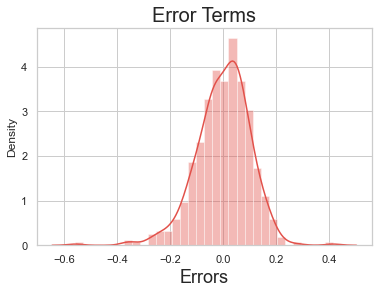

In [369]:
# Histogram.
sns.distplot(res)
plt.title('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [370]:
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [371]:
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Light Snow',
       'Mist+Cloudy', 'spring', 'summer', 'winter', 'year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

## Step 6: Prediction and Evaluation on Test set

In [372]:
# Create a list of numeric variables(normalized)
num_vars = ["temp","humidity","windspeed","count"]
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [373]:
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.255708,0.264840,0.232877,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.437258,0.442259,0.423633,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [374]:
# Create X_test and y_test
X_test = df_test
y_test = df_test.pop('count')

In [375]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: count, dtype: float64

In [376]:
X_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist+Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
184,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0.511964,0.837699,0.334206
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0.817246,0.314298,0.537414


In [377]:
# Add Constant to make Predicition
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,...,Mist+Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
184,1.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0.831783,0.657364,0.084219
535,1.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0.901354,0.610133,0.153728
299,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0.511964,0.837699,0.334206
221,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,1.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0.817246,0.314298,0.537414


In [378]:
# Drop 'March','June','October','Thursday','Sunday','Saturday','Workingday','August','Wednesday','May','Feburary','Humidity','Temperature','July','Winter' from X_test
X_test_sm = X_test_sm.drop(['Mar','June','Oct','Thurs','Sun','Sat','workingday','Aug','Wed','May','Feb','humidity','temp','July','winter' ], axis = 1)
X_test_sm.head()

,const,Dec,Jan,Nov,Sep,Mon,Tues,Light Snow,Mist+Cloudy,spring,summer,year,holiday,windspeed
184,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0.084219
535,1.0,0,0,0,0,0,0,0,0,0,1,1,0,0.153728
299,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.339570
152,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0.537414


In [379]:
# Prediction.
y_test_pred = lr_model.predict(X_test_sm)

In [380]:
# Evaluate R-squared.
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7868995184744217

In [381]:
# Evaluate Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1) {#n =sample size , p = number of independent variables}

Adj_r2 = 1-(1-0.7868995)*(14-1)/(14-1-1)
print(Adj_r2)

0.769141125


Text(0, 0.5, 'y_test_pred')

<Figure size 432x288 with 0 Axes>

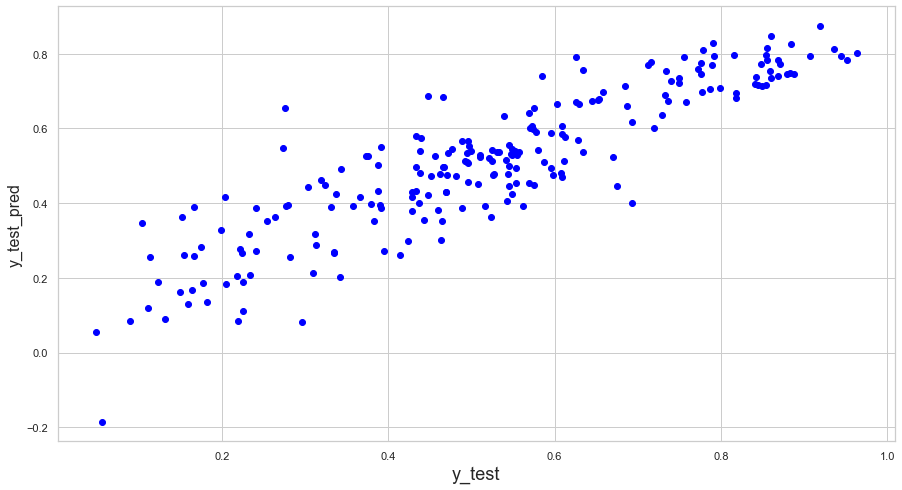

In [382]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_pred,color='blue')
fig.suptitle('y_test vs y_test_pred', fontsize=20)     # Plot heading 
plt.xlabel('y_test', fontsize=18)                      # X-label
plt.ylabel('y_test_pred', fontsize=16)                 # y-label

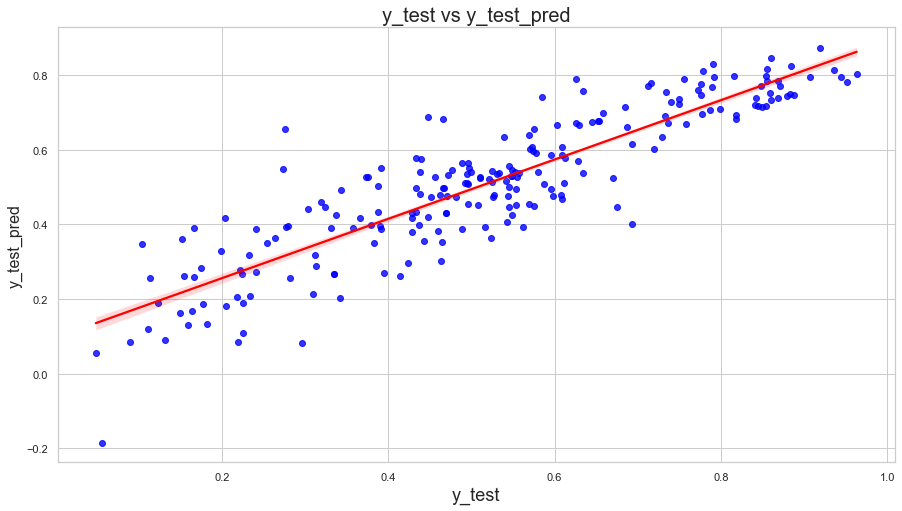

In [383]:
# Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x = y_test, y = y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

In [384]:
## Final Result Comparison between Train model and Test:
#- Train R^2 : 0.796
#- Train Adjusted R^2 : 0.791
#- Test R^2: 0.786
#- Test Adjusted R^2: 0.769
#- Difference in R^2 between train and test: 1%
#- Difference in adjusted R^2 between Train and test: 2.2% which is less than 5%